In [3]:
from math import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
X = pd.read_excel ('Official_Foreign_Exchange_Rates_NBRK_on_15_03_2020.xls', delimiter = ';')

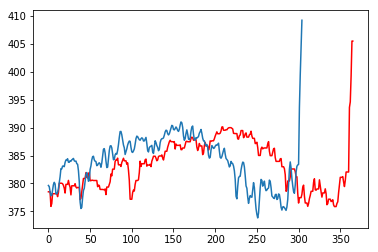

In [13]:
values = X['USD'].values
N = len(values)
t = (N + 1) // 6
r = 13
X1 = [values [i: N - t + i] for i in range(t)]
X1 = np.array(X1)

cov_m = X1.dot(X1.T) / (N - t)
val, vec = np.linalg.eig(cov_m)

vec_t = vec[-1, :r]
vec_ast = vec[:t - 1, :r]
q = X1[-t+1:]
vec_mult = vec_t.dot(vec_ast.T)
pred = vec_mult.dot(q) / (1 - vec_t.dot(vec_t.T))

plt.plot(values, 'r')
plt.plot(pred)
plt.show()